# the midpoint rule

Write a program which uses the midpoint rule to compute (subdivide the interval in n subintervals)

Compute and plot the (absolute) error between the measured In and the analytical value I as a function of the subinterval size h.

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display, Latex
import sympy as sy
import math

sy.init_printing()

In [3]:
#the midpoint rule or rectangle rule: integral from a to b f(x)dx = (b-a)f((a+b)/2)
def the_midpoint_rule(a,b,f):
  return (b-a)*f((a+b)/2)

In [4]:
x, y = sy.symbols('x y', real=True)

In [5]:
start=0
end=np.pi/2

mid_x=the_midpoint_rule(start, end, lambda x:x)
anal_x=sy.integrate(x, (x, start, end))#(end**2-start**2)/2
mid_cos=the_midpoint_rule(start, end, np.cos)
anal_cos=sy.integrate(sy.cos(x), (x, start, end))#np.sin(end) - np.sin(start)

print(f'''For the midpoint rule or rectangle rule we use starting point as {start} and end point as {round(end, 2)}.
The absolute error for the linear function is ~{round(abs(mid_x-anal_x),4)} and for the cosine is ~{round(abs(mid_cos-anal_cos),4)}.''')

For the midpoint rule or rectangle rule we use starting point as 0 and end point as 1.57.
The absolute error for the linear function is ~0 and for the cosine is ~0.1107.


In [6]:
#but this form of representation does not support any changes in start and end points
Latex(data=f'For \ the \ midpoint \ rule \ or \ rectangle \ rule \ the \ absolute \ errors \ for \ calculating \ ' 
      + ' \int_{0}^{\pi/2} x \,dx' + f'\ is \ ≈{round(abs(mid_x-anal_x),4)} \  \ and \ for \ '
      + ' \int_{0}^{\pi/2} cos(x) \,dx' + f'\ is \ ≈{round(abs(mid_cos-anal_cos),4)}.')

<IPython.core.display.Latex object>

In [7]:
n=30 #<-- total numser of subintervals

In [8]:
I_lin_mid, I_cos_mid=np.zeros((n)), np.zeros((n))

for i in range(1,n+1):
  h=np.linspace(start, end, i+1)
  I_lin_mid[i-1]=round(abs(anal_x-sum([the_midpoint_rule(h[j],h[j+1],lambda x:x) for j in range(len(h)-1)])), 14)
  I_cos_mid[i-1]=(abs(anal_cos-sum([the_midpoint_rule(h[j],h[j+1], np.cos) for j in range(len(h)-1)])))

Text(0, 0.5, 'absolute error')

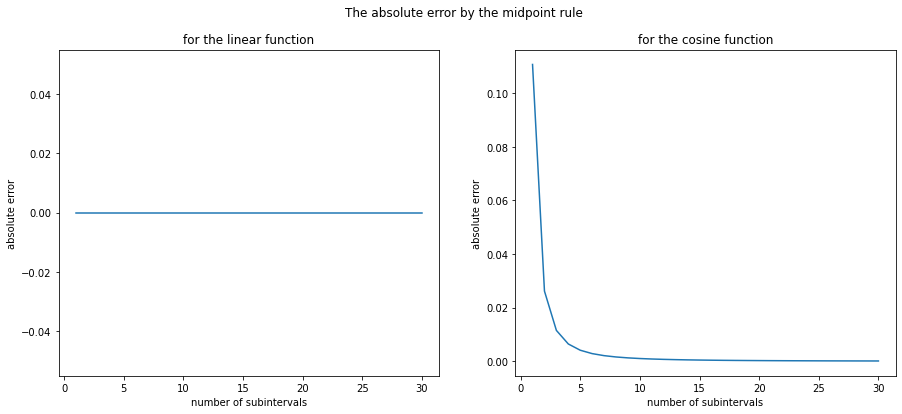

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
fig.suptitle('The absolute error by the midpoint rule')

ax1.plot(range(1,n+1), I_lin_mid)
ax1.set_title('for the linear function')
ax1.set_xlabel('number of subintervals')
ax1.set_ylabel('absolute error')

ax2.plot(range(1,n+1), I_cos_mid)
ax2.set_title('for the cosine function')
ax2.set_xlabel('number of subintervals')
ax2.set_ylabel('absolute error')

# the trapezoidal rule

Same exercise as above but with the trapezoidal rule. 
Which method is the most accurate?

In [10]:
#the trapezoidal rule: integral from a to b f(x)dx = (b-a) * (f(a)+f(b)/2)
def the_trapezoidal_rule(a,b,f):
  return (b-a) * (f(a)+f(b)/2)

In [11]:
tr_x=the_trapezoidal_rule(start, end, lambda x:x)
tr_cos=the_trapezoidal_rule(start, end, np.cos)

print(f'''For the trapezoidal rule we use starting point as {start} and end point as {round(end,2)}.
The absolute error for the linear function is ~{round(abs(tr_x-anal_x),4)} and for the cosine is ~{round(abs(tr_cos-anal_cos),4)}.''')

For the trapezoidal rule we use starting point as 0 and end point as 1.57.
The absolute error for the linear function is ~0 and for the cosine is ~0.5708.


In [12]:
#but this form of representation does not support any changes in start and end points
Latex(data=f'For \ the \ trapezoidal \ rule \ the \ absolute \ errors \ for \ calculating \ ' 
      + ' \int_{0}^{\pi/2} x \,dx' + f'\ is \ ≈{round(abs(tr_x-anal_x),4)} \  \ and \ for \ '
      + ' \int_{0}^{\pi/2} cos(x) \,dx' + f'\ is \ ≈{round(abs(tr_cos-anal_cos),4)}.')

<IPython.core.display.Latex object>

In [13]:
I_lin_tr, I_cos_tr=np.zeros((n)), np.zeros((n))

for i in range(1,n+1):
  h=np.linspace(start, end, i+1)
  I_lin_tr[i-1]=abs(anal_x-sum([the_trapezoidal_rule(h[j],h[j+1],lambda x:x) for j in range(len(h)-1)]))
  I_cos_tr[i-1]=abs(anal_cos-sum([the_trapezoidal_rule(h[j],h[j+1], np.cos) for j in range(len(h)-1)]))

Text(0, 0.5, 'absolute error')

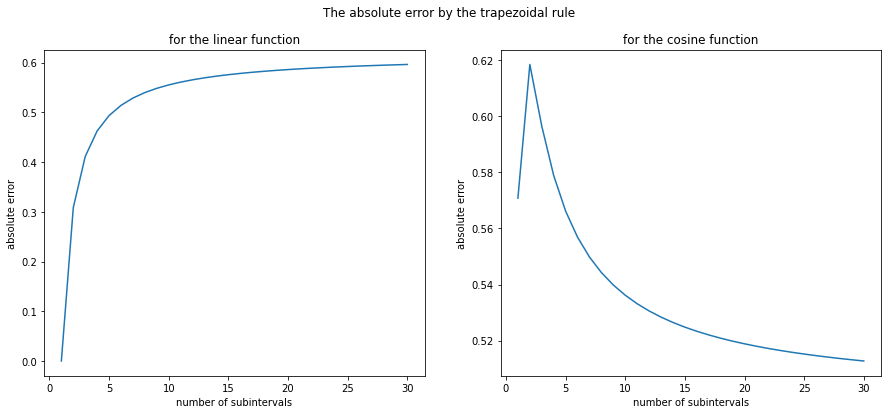

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
fig.suptitle('The absolute error by the trapezoidal rule')

ax1.plot(range(1,n+1), I_lin_tr)
ax1.set_title('for the linear function')
ax1.set_xlabel('number of subintervals')
ax1.set_ylabel('absolute error')

ax2.plot(range(1,n+1), I_cos_tr)
ax2.set_title('for the cosine function')
ax2.set_xlabel('number of subintervals')
ax2.set_ylabel('absolute error')

# comparison

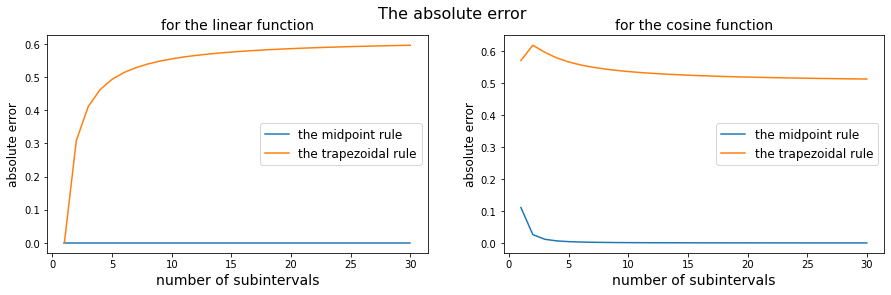

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
fig.suptitle('The absolute error', fontsize=16)

ax1.plot(range(1,n+1), I_lin_mid, label='the midpoint rule')
ax1.plot(range(1,n+1), I_lin_tr, label='the trapezoidal rule')
ax1.set_title('for the linear function', fontsize=14)
ax1.set_xlabel('number of subintervals', fontsize=14)
ax1.set_ylabel('absolute error', fontsize=12)
ax1.legend(loc='center right', fontsize=12)

ax2.plot(range(1,n+1), I_cos_mid, label='the midpoint rule')
ax2.plot(range(1,n+1), I_cos_tr, label='the trapezoidal rule')
ax2.set_title('for the cosine function', fontsize=14)
ax2.set_xlabel('number of subintervals', fontsize=14)
ax2.set_ylabel('absolute error', fontsize=12)
ax2.legend(loc='center right', fontsize=12)

plt.savefig('1d midpoint vs trapezoidal.pdf')
# plt.savefig('1d midpoint vs trapezoidal.png', transparent=True, dpi=600)

plt.show()

# bonus

In [16]:
c,d,a,b=1,3,2,4
I_bonus=int(sy.integrate(sy.integrate((x**3)*(y**2) + x*y +1, (x, 2, 4)), (y, 1, 3)))
#(d**3 - c**3)*(b**4 - a**4)/12 + (d**2 - c**2)*(b**2 - a**2)/4 + (d-c)*(b-a)

print('Ananlytical solution for the given integral is')
Latex('\int_{1}^{3} \int_{2}^{4} (x^2y^3 + xy + 1) \,dx\,dy = ' +f'{I_bonus}')

Ananlytical solution for the given integral is


<IPython.core.display.Latex object>

In [17]:
def the_bonus_mid(a_m, b_m, c_m, d_m):
  return (b_m-a_m)*(d_m - c_m)*(((c_m + d_m)**3)*((a_m + b_m)**2)/(2**5) + (a_m + b_m)*(c_m + d_m)/4 + 1)

In [18]:
the_bonus_mid(c, d, a, b)

In [19]:
def the_bonus_tr(a_t, b_t, c_t, d_t):
  return (b_t-a_t)*(d_t-c_t)*((b_t**2 + a_t**2)*(d_t**3 + c_t**3) + (b_t+a_t)*(d_t+c_t) + 4)/4

In [20]:
the_bonus_tr(a, b, c, d)

In [21]:
I_bonus_mid, I_bonus_tr=np.zeros((n,n)), np.zeros((n,n))
start_a, end_b, start_c, end_d=2,4,1,3

for i in range(2,n+2):
  hy=np.linspace(start_c, end_d, i+1) #<--- y
  for j in range(2,n+2):
    hx=np.linspace(start_a, end_b, j+1) #<----- x
    mid=[[the_bonus_mid(hy[l], hy[l+1], hx[k], hx[k+1]) for k in range(len(hx)-1)] for l in range(len(hy)-1)]
    tr=[[the_bonus_tr(hy[l], hy[l+1], hx[k], hx[k+1]) for k in range(len(hx)-1)] for l in range(len(hy)-1)]
    I_bonus_mid[i-2][j-2]=sum(np.array(mid).flatten())
    I_bonus_tr[i-2][j-2]=sum(np.array(tr).flatten())

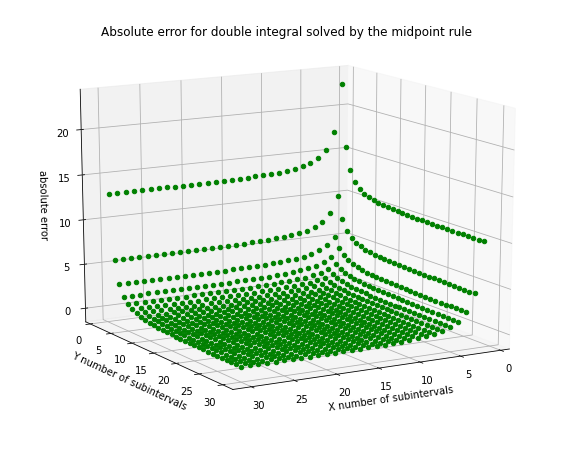

In [22]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')

for i in range(1,n+1):
  for j in range(1,n+1):
    ax.scatter(i, j, abs(I_bonus_mid[i-1][j-1]-I_bonus), color='g')

ax.set_xlabel('X number of subintervals')
ax.set_ylabel('Y number of subintervals')
ax.set_zlabel('absolute error')
ax.view_init(15,60)
ax.set_title('Absolute error for double integral solved by the midpoint rule')

#plt.savefig('midpoint double integral.pdf')
#plt.savefig('midpoint double integral.png', transparent=True, dpi=600)

plt.show()

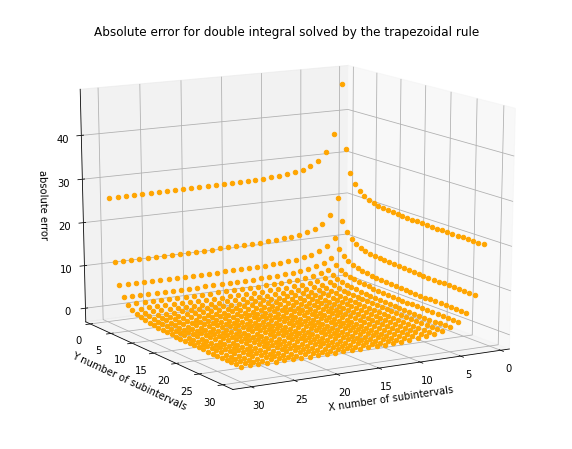

In [23]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for i in range(1,n+1):
  for j in range(1,n+1):
    ax.scatter(i, j, I_bonus_tr[i-1][j-1]-I_bonus, color='orange')

ax.set_xlabel('X number of subintervals')
ax.set_ylabel('Y number of subintervals')
ax.set_zlabel('absolute error')
ax.view_init(15,60)
plt.title('Absolute error for double integral solved by the trapezoidal rule')

#plt.savefig('trapezoidal double integral.pdf')
#plt.savefig('trapezoidal double integral.png', transparent=True, dpi=600)

plt.show()

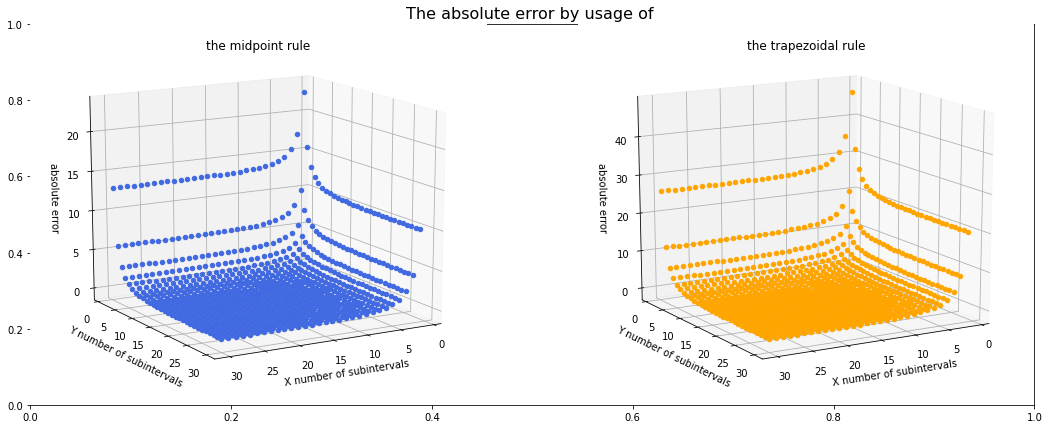

In [24]:
fig = plt.figure(figsize=(18,7))
plt.title('The absolute error by usage of ', fontsize=16)

ax1, ax2 = fig.add_subplot(1, 2, 1, projection='3d'), fig.add_subplot(1, 2, 2, projection='3d')

for i in range(1,n+1):
  for j in range(1,n+1):
    ax2.scatter(i, j, abs(I_bonus_tr[i-1][j-1]-I_bonus), c='orange')
    ax1.scatter(i, j, abs(I_bonus_mid[i-1][j-1]-I_bonus), c='royalblue')

ax1.set_xlabel('X number of subintervals')
ax1.set_ylabel('Y number of subintervals')
ax1.set_zlabel('absolute error')
ax1.view_init(15,60)
ax1.set_title('the midpoint rule')

ax2.set_xlabel('X number of subintervals')
ax2.set_ylabel('Y number of subintervals')
ax2.set_zlabel('absolute error')
ax2.view_init(15,60)
ax2.set_title('the trapezoidal rule')

# plt.savefig('3d comparison double integral.pdf')
# plt.savefig('3d comparison double integral.png', transparent=True, dpi=600)

plt.show()

In [25]:
xcoords=np.tile(np.arange(1, n+1, 1), n)
ycoords=np.repeat(np.arange(1, n+1, 1), n)

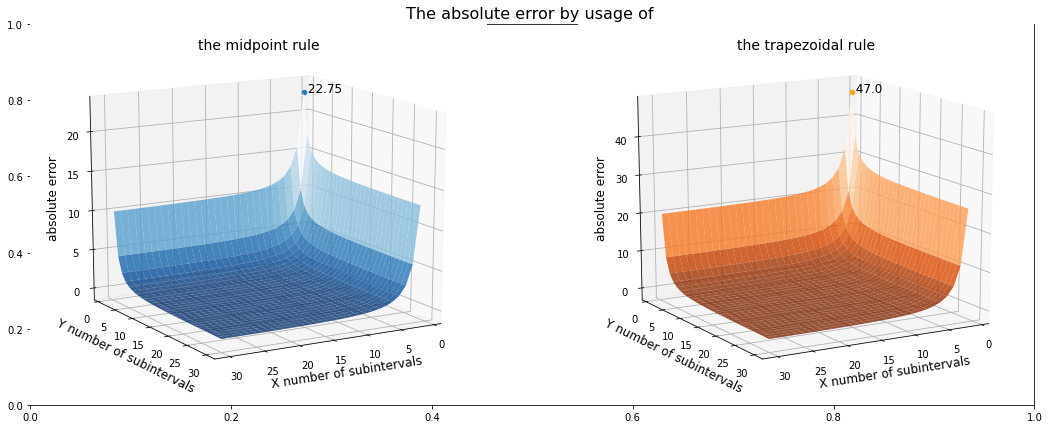

In [26]:
fig = plt.figure(figsize=(18,7))
plt.title('The absolute error by usage of ', fontsize=16)

ax1, ax2 = fig.add_subplot(1, 2, 1, projection='3d'), fig.add_subplot(1, 2, 2, projection='3d')

p_mid=ax1.plot_surface(xcoords.reshape((n,n)), ycoords.reshape((n,n)), 
                      abs(I_bonus_mid-I_bonus), cmap = 'Blues_r', alpha=0.8)

p_tr=ax2.plot_surface(xcoords.reshape((n,n)), ycoords.reshape((n,n)), 
                      abs(I_bonus_tr-I_bonus), cmap = 'Oranges_r', alpha=0.8)

ax1.scatter(1,1, abs(I_bonus_mid[0,0]-I_bonus))
ax1.text(1,1, abs(I_bonus_mid[0,0]-I_bonus), 
         f' {abs(I_bonus_mid[0,0]-I_bonus)}', fontsize=12)
ax2.scatter(1,1, abs(I_bonus_tr[0,0]-I_bonus), c='orange')
ax2.text(1,1, abs(I_bonus_tr[0,0]-I_bonus), 
         f' {abs(I_bonus_tr[0,0]-I_bonus)}', fontsize=12)

ax1.set_xlabel('X number of subintervals', fontsize=12)
ax1.set_ylabel('Y number of subintervals', fontsize=12)
ax1.zaxis.set_rotate_label(False)
ax1.set_zlabel('absolute error', rotation=90, fontsize=12)
ax1.view_init(15,60)
ax1.set_title('the midpoint rule', fontsize=14)

ax2.set_xlabel('X number of subintervals', fontsize=12)
ax2.set_ylabel('Y number of subintervals', fontsize=12)
ax2.zaxis.set_rotate_label(False)
ax2.set_zlabel('absolute error', rotation=90, fontsize=12)
ax2.view_init(15,60)
ax2.set_title('the trapezoidal rule', fontsize=14)

# plt.savefig('3d comparison double integral.pdf')
# plt.savefig('3d comparison double integral.png', transparent=True, dpi=600)

plt.show()

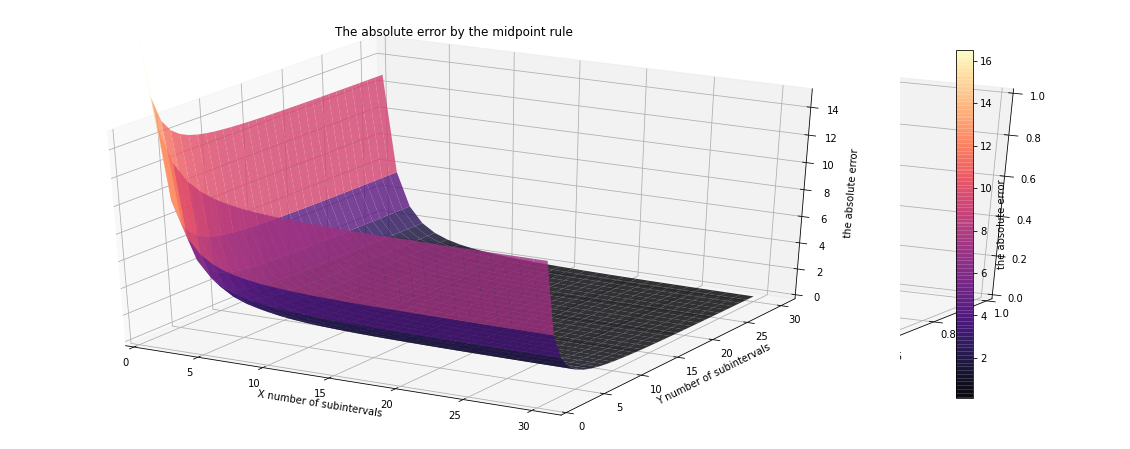

In [27]:
fig = plt.figure(figsize=(20,8))
ax = fig.gca(projection='3d')
ax = fig.add_subplot(projection='3d')
p_mid=ax.plot_surface(xcoords.reshape((n,n)), ycoords.reshape((n,n)), 
                      abs(I_bonus_mid-I_bonus), cmap = 'magma', alpha=0.8)

ax.set_xlabel('X number of subintervals')
ax.set_ylabel('Y number of subintervals')
ax.set_zlabel('the absolute error')
plt.title('The absolute error by the midpoint rule')
ax.set_zlim(0,15)
ax.set_xlim(0)
ax.set_ylim(0)
plt.grid()

cbar=fig.colorbar(p_mid, ax=ax, shrink=0.8)
cbar.set_label('the absolute error')

#plt.savefig('trapezoidal double integral.pdf')
#plt.savefig('trapezoidal double integral.png', transparent=True, dpi=600)

plt.show()

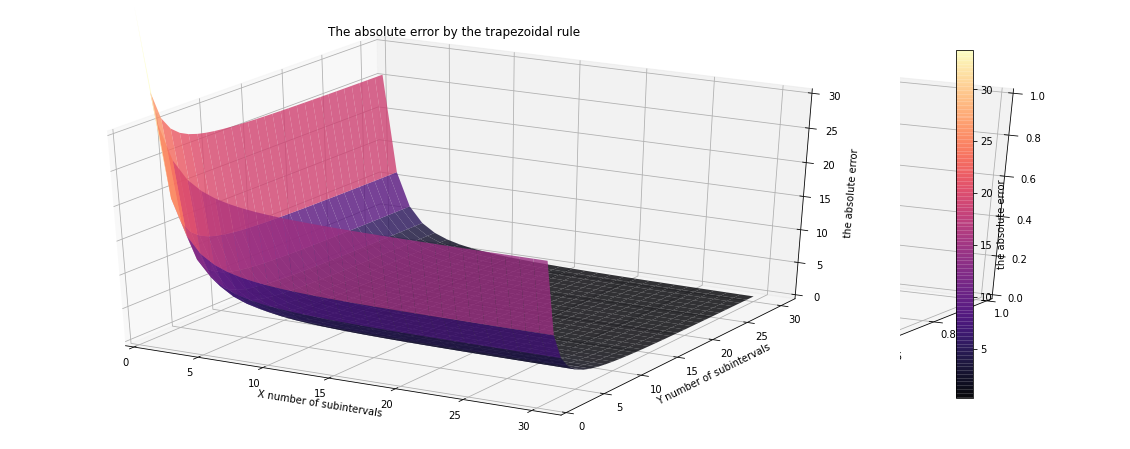

In [28]:
fig = plt.figure(figsize=(20,8))
ax = fig.gca(projection='3d')
ax = fig.add_subplot(projection='3d')
p_tr=ax.plot_surface(xcoords.reshape((n,n)), ycoords.reshape((n,n)), 
                     abs(I_bonus_tr-I_bonus), cmap='magma', alpha=0.8)
ax.set_xlabel('X number of subintervals')
ax.set_ylabel('Y number of subintervals')
ax.set_zlabel('the absolute error')
ax.set_title('The absolute error by the trapezoidal rule')
ax.set_zlim(0,30)
ax.set_xlim(0)
ax.set_ylim(0)
# plt.title('Timestep %.2d' %(dt),loc='right') 
plt.grid()
cbar=fig.colorbar(p_tr, ax=ax, shrink=0.8)
cbar.set_label('the absolute error')

#plt.savefig('trapezoidal double integral.pdf')
#plt.savefig('trapezoidal double integral.png', transparent=True, dpi=600)

plt.show()

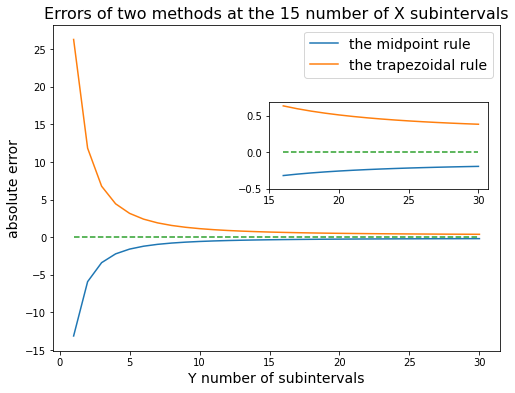

In [32]:
fig, main_ax = plt.subplots(figsize=(8,6))
main_ax.plot(range(1,n+1,1), (I_bonus_mid)[n//2][:] - I_bonus, label='the midpoint rule')
main_ax.plot(range(1,n+1,1), (I_bonus_tr)[n//2][:] - I_bonus, label='the trapezoidal rule')
main_ax.plot(range(1,n+1,1), [0]*n, '--')
main_ax.set_title(f'Errors of two methods at the {n//2} number of X subintervals', fontsize=16)
main_ax.set_xlabel('Y number of subintervals', fontsize=14)
main_ax.set_ylabel('absolute error', fontsize=14)
main_ax.legend(fontsize=14)

right_inset_ax = fig.add_axes([.5, .5, .38, .2])
right_inset_ax.plot(range(1,n+1,1)[n//2:], (I_bonus_mid)[n//2][n//2:] - I_bonus)
right_inset_ax.plot(range(1,n+1,1)[n//2:], (I_bonus_tr)[n//2][n//2:] - I_bonus)
right_inset_ax.plot(range(1,n+1,1)[n//2:], [0]*(n//2), '--')
right_inset_ax.set(xlim=(n//2), ylim=(-0.5), xticks=np.linspace(15,30,4))

#plt.savefig('slice double integral comparison2X.pdf')
plt.savefig('slice double integral comparison2X.png', transparent=True, dpi=600)

plt.show()

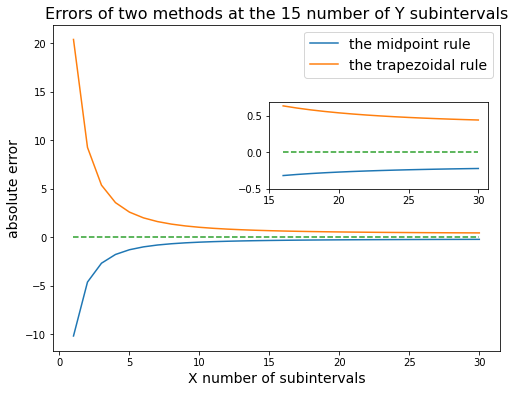

In [31]:
fig, main_ax = plt.subplots(figsize=(8,6))
main_ax.plot(range(1,n+1,1), (I_bonus_mid.T)[n//2][:] - I_bonus, label='the midpoint rule')
main_ax.plot(range(1,n+1,1), (I_bonus_tr.T)[n//2][:] - I_bonus, label='the trapezoidal rule')
main_ax.plot(range(1,n+1,1), [0]*n, '--')
main_ax.set_title(f'Errors of two methods at the {n//2} number of Y subintervals', fontsize=16)
main_ax.set_xlabel('X number of subintervals', fontsize=14)
main_ax.set_ylabel('absolute error', fontsize=14)
main_ax.legend(fontsize=14)

right_inset_ax = fig.add_axes([.5, .5, .38, .2])
right_inset_ax.plot(range(1,n+1,1)[n//2:], (I_bonus_mid.T)[n//2][n//2:] - I_bonus)
right_inset_ax.plot(range(1,n+1,1)[n//2:], (I_bonus_tr.T)[n//2][n//2:] - I_bonus)
right_inset_ax.plot(range(1,n+1,1)[n//2:], [0]*(n//2), '--')
right_inset_ax.set(xlim=(n//2), ylim=(-0.5), xticks=np.linspace(15,30,4))

#plt.savefig('slice double integral comparison2Y.pdf')
plt.savefig('slice double integral comparison2Y.png', transparent=True, dpi=600)

plt.show()